# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

## I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [125]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_log']= np.log(tips['tip'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,tip_log
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,0.009950
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,0.506818
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,1.252763
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,1.196948
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,1.283708


In [3]:
# 1. Criando a matriz de design e a matriz y usando Patsy
formula = 'tip ~ sex + smoker + time + net_bill'
y, X = dmatrices(formula, tips, return_type='dataframe')
X

,Intercept,sex[T.Female],smoker[T.No],time[T.Dinner],net_bill
0,1.0,1.0,1.0,1.0,15.98
1,1.0,0.0,1.0,1.0,8.68
2,1.0,0.0,1.0,1.0,17.51
3,1.0,0.0,1.0,1.0,20.37
4,1.0,1.0,1.0,1.0,20.98
...,...,...,...,...,...
239,1.0,0.0,1.0,1.0,23.11
240,1.0,1.0,0.0,1.0,25.18
241,1.0,0.0,0.0,1.0,20.67
242,1.0,0.0,1.0,1.0,16.07


In [4]:
# 2. Remova as variáveis não significantes.
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           2.64e-20
Time:                        15:44:26   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.

- Verificamos que as variáveis sex[T.Female], smoker[T.No] e time[T.Dinner] não são estatisticament relevantes para explicar a variável tips.
- Vamos manter somente a variável net_bill e smoker[T.No] (que possui o menor P entre as variáveis acima) no modelo

In [5]:
formula = 'tip ~ smoker + net_bill'
y, X = dmatrices(formula, tips, return_type='dataframe')
X.head()

,Intercept,smoker[T.No],net_bill
0,1.0,1.0,15.98
1,1.0,1.0,8.68
2,1.0,1.0,17.51
3,1.0,1.0,20.37
4,1.0,1.0,20.98


In [6]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.67
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           4.56e-22
Time:                        15:44:26   Log-Likelihood:                -375.20
No. Observations:                 244   AIC:                             756.4
Df Residuals:                     241   BIC:                             766.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2318      0.200      6.172   

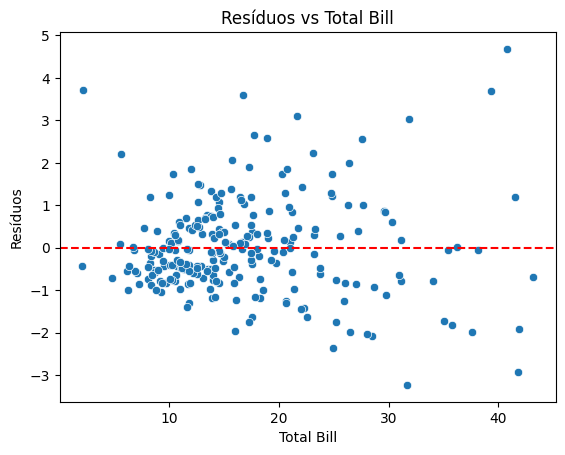

In [7]:
# 3. Gráfico de resíduos em função de net_bill
tips['res_log'] = model.resid
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Total Bill')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Total Bill')
plt.show()

- O gráfico não está perfeito, mas podemos considerar um gráfico razoável.

In [8]:
# 4. Testando transformações em net_bill (log e polinômio)

# Transformação logarítmica de net_bill
X['net_bill_log'] = np.log(X['net_bill'])

# Ajustando o modelo com a transformação logarítmica
model_log = sm.OLS(y, X[['Intercept', 'smoker[T.No]', 'net_bill_log']]).fit()

# Transformação polinomial de net_bill
X['net_bill__pol'] = X['net_bill'] ** 2 +  X['net_bill']

# Ajustando o modelo com a transformação polinomial
model_poly = sm.OLS(y, X[['Intercept', 'smoker[T.No]', 'net_bill__pol']]).fit()

In [9]:
# Comparando os modelos
print("Modelo com transformação logarítmica:")
print(model_log.summary())
print("\nModelo com transformação polinomial:")
print(model_poly.summary())

Modelo com transformação logarítmica:
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.34
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           5.38e-19
Time:                        15:44:26   Log-Likelihood:                -382.36
No. Observations:                 244   AIC:                             770.7
Df Residuals:                     241   BIC:                             781.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept 

- O modelo polinômial teve um melhor R-squared em relação ou logarítimo, porém um o modelo de regressão linear ainda foi melhor que ambos.

## II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [10]:
# 1. Criando a matriz de design e a matriz y usando Patsy (log de tip)

formula = 'np.log(tip) ~ sex + smoker + day + net_bill'
y, X = dmatrices(formula, tips, return_type='dataframe')

# Ajustando o modelo
model_log_tip = sm.OLS(y, X).fit()

In [11]:
# 2. Removendo variáveis não significativas

significant_variables = model_log_tip.pvalues[model_log_tip.pvalues < 0.05].index
X = X[significant_variables]

model_log_tip = sm.OLS(y, X).fit()

print(model_log_tip.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           2.60e-21
Time:                        15:44:26   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.0

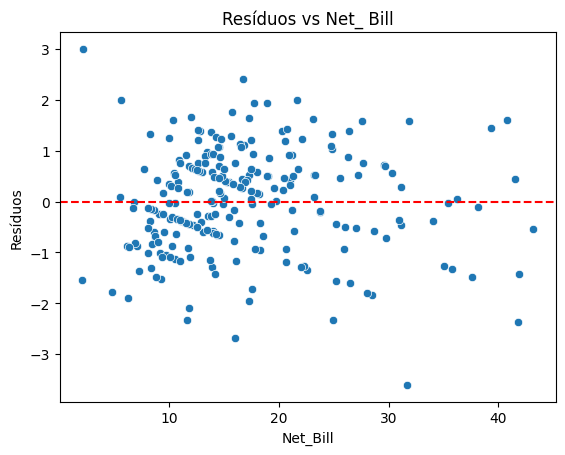

In [12]:
# 3. Gráfico de resíduos em função de net_bill

influence = OLSInfluence(model_log_tip)
residuals = influence.resid_studentized_internal
sns.scatterplot(x=tips['net_bill'], y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Net_Bill')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Net_ Bill')
plt.show()

In [13]:
# 4. Testar transformar "net_bill" no log e um polinômio e escolher o melhor modelo.
# Transformação logarítmica de net_bill
X['log_net_bill'] = np.log(tips['net_bill'])

# Ajustar o modelo com a transformação logarítmica
model_log_net_bill = sm.OLS(y, X[['Intercept', 'log_net_bill']]).fit()

# Transformação polinomial de net_bill
X['net_bill_pol'] = tips['net_bill'] ** 2 + tips['net_bill']

# Ajustar o modelo com a transformação polinomial
model_poly_net_bill = sm.OLS(y, X[['Intercept', 'net_bill_pol']]).fit()

In [14]:
# Comparar os modelos
print("Modelo com transformação logarítmica:")
print(model_log_net_bill.summary())
print("\nModelo com transformação polinomial:")
print(model_poly_net_bill.summary())

Modelo com transformação logarítmica:
                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           5.62e-22
Time:                        15:44:26   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept 

- O modelo logaritmico se saiu melhor que o modelo polinomial

In [24]:
# 5. Calcular o R² na escala de "tip" (sem o log) para o modelo final deste item e comparar com o modelo do item 1.
log_tip_pred = model_log_net_bill.predict(X[['Intercept', 'log_net_bill']])

# desfazendo o log
tips['log_tip_pred_sem_log'] = np.exp(log_tip_pred)

mse_modelo_final = mean_squared_error(tips['tip'], tips['log_tip_pred_sem_log'])
print(mse_modelo_final)

mse_primeiro_modelo = mean_squared_error(tips['tip'], model.fittedvalues)
print(mse_primeiro_modelo)

1.3299393849135397
1.2681018049074047


- Nenhum dos valores de MSE ficaram dentro da faixa, ou seja, com os dados disponíveis e as variáveis usadas, o modelo não está representando bem os dados.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [28]:
df = pd.read_csv('previsao_de_renda.csv', index_col=0)
df.head()

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [32]:
df.shape

(15000, 14)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   id_cliente             15000 non-null  int64  
 2   sexo                   15000 non-null  object 
 3   posse_de_veiculo       15000 non-null  bool   
 4   posse_de_imovel        15000 non-null  bool   
 5   qtd_filhos             15000 non-null  int64  
 6   tipo_renda             15000 non-null  object 
 7   educacao               15000 non-null  object 
 8   estado_civil           15000 non-null  object 
 9   tipo_residencia        15000 non-null  object 
 10  idade                  15000 non-null  int64  
 11  tempo_emprego          12427 non-null  float64
 12  qt_pessoas_residencia  15000 non-null  float64
 13  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(3), object(6)
memory usage: 1

In [35]:
df[['renda', 'tempo_emprego']].describe()

,renda,tempo_emprego
count,15000.000000,12427.000000
mean,5697.287057,7.722635
std,8266.816289,6.711189
min,118.710000,0.117808
25%,2026.110000,2.973973
50%,3499.720000,6.013699
75%,6392.167500,10.120548
max,245141.670000,42.906849


In [72]:
df['tempo_emprego'].isna().sum()

2573

- Como usaremos somente a variável tempo_emprego para exlicar a variável target, vamos excluir os valores nulos dessa variável no dataset

In [77]:
df_2 = df.dropna(subset=['tempo_emprego'])
df_2.shape

(12427, 14)

array([[<Axes: title={'center': 'tempo_emprego'}>]], dtype=object)

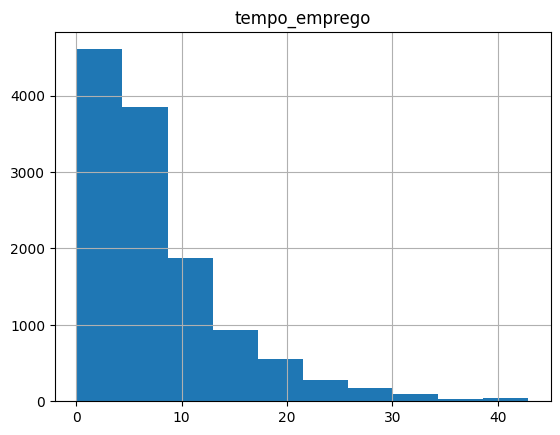

In [80]:
df_2[['tempo_emprego']].hist()

<Axes: >

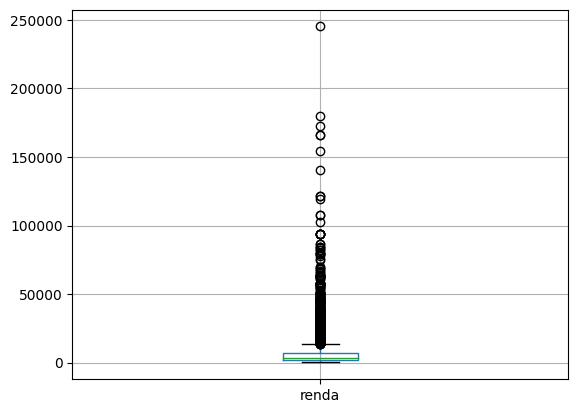

In [84]:
df_2[['renda']].boxplot()

In [90]:
print('Média da renda', df['renda'].mean())
print('Mediana da renda', df['renda'].median())
print('Desvio-padrão da renda ', df['renda'].std())

Média da renda 5697.287056666667
Mediana da renda 3499.72
Desvio-padrão da renda  8266.816289356577


In [99]:
# Como limite para os outliers vamos definir que seja até 1.5x o desvio-padrão
df_2 = df_2[df_2['renda']<1.5*df['renda'].std()]
df_2.shape

(11185, 14)

<Axes: >

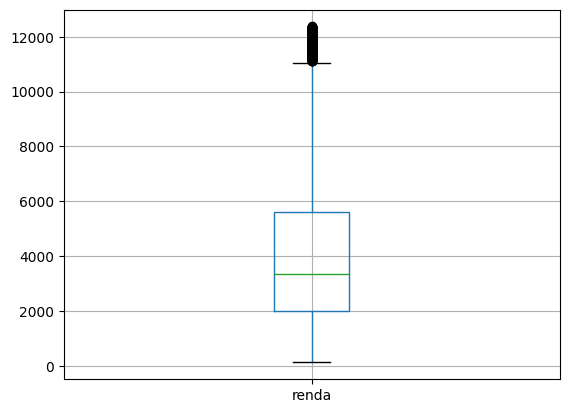

In [100]:
df_2[['renda']].boxplot()

In [103]:
print('Reduzimos a quantidade de registros de', df.shape[0], 'para', df_2.shape[0])

Reduzimos a quantidade de registros de 15000 para 11185


In [105]:
df_2[['tempo_emprego']].isna().sum()

tempo_emprego    0
dtype: int64

In [108]:
print('Nova média da renda', df_2['renda'].mean())
print('Nova mediana da renda', df_2['renda'].median())
print('Novo desvio-padrão da renda ', df_2['renda'].std())

Nova média da renda 4097.697752346894
Nova mediana da renda 3329.12
Novo desvio-padrão da renda  2762.2699598416884


### 1. Ajuste um modelo de regressão linear simples para explicar renda como variável resposta, por tempo_emprego como variável explicativa.

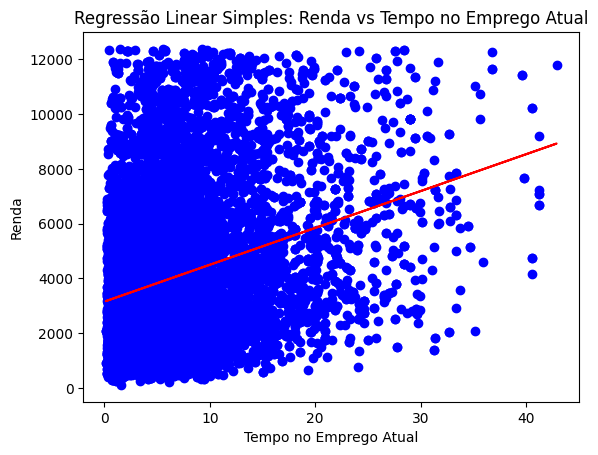

Coeficiente de inclinação (slope): 134.31066426516608
Interceptação (intercept): 3157.993326757415


In [110]:
# Selecionando as variáveis para a regressão linear simples
X = df_2[['tempo_emprego']]
y = df_2['renda']

# Ajustando o modelo de regressão linear
regression_model = LinearRegression()
regression_model.fit(X, y)

# Coeficientes do modelo
slope = regression_model.coef_[0]
intercept = regression_model.intercept_

# Visualizando o modelo
plt.scatter(X, y, color='blue')
plt.plot(X, regression_model.predict(X), color='red')
plt.xlabel('Tempo no Emprego Atual')
plt.ylabel('Renda')
plt.title('Regressão Linear Simples: Renda vs Tempo no Emprego Atual')
plt.show()

print("Coeficiente de inclinação (slope):", slope)
print("Interceptação (intercept):", intercept)

- Percebemos uma relação positiva entre o tempo de emprego e a renda

### 2. Análise de Resíduos para a Regressão Linear Simples

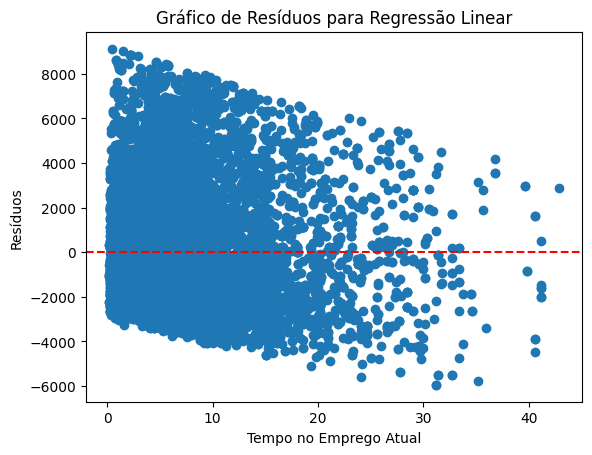

In [113]:
# Calculando os resíduos
residuos= y - regression_model.predict(X)

# Gráfico de resíduos
plt.scatter(X, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Tempo no Emprego Atual')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos para Regressão Linear')
plt.show()

(array([  28.,  740., 3272., 2832., 1658., 1060.,  734.,  460.,  318.,
          83.]),
 array([-5956.27579606, -4448.62595012, -2940.97610418, -1433.32625825,
           74.32358769,  1581.97343363,  3089.62327956,  4597.2731255 ,
         6104.92297144,  7612.57281737,  9120.22266331]),
 <BarContainer object of 10 artists>)

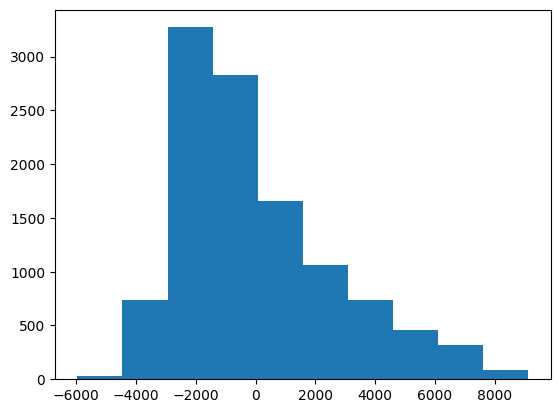

In [114]:
plt.hist(residuos)

- O gráfico dos resíduos mostra uma certa tendência dos pontos.
- O histograma dos resíduos, não se assemelha a uma distribuição normal.
- Portanto a variável tempo_emprego, sozinha, não é um bom preditor para a variável renda.

### 3. Ajuste um modelo de regressão linear múltipla para explicar renda (ou uma transformação de renda) de acordo com as demais variáveis.

In [142]:
y, X = dmatrices('''renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) +
                            qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil) +
                            C(tipo_residencia) + idade + tempo_emprego + qt_pessoas_residencia''', 
                 df_2, return_type='dataframe')

In [143]:
modelo_completo = sm.OLS(y,X).fit()
modelo_completo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     136.6
Date:                Mon, 25 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:50:56   Log-Likelihood:            -1.0306e+05
No. Observations:               11185   AIC:                         2.062e+05
Df Residuals:                   11160   BIC:                         2.063e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            -362.8824    799.468     -0.454      0.650   -1929.980    1204.215
C(sexo)[T.M]                         2152.5118     53.792     40.016      0.000    2047.071    2257.953
C(posse_de_veiculo)[T.True]           133.6668     50.291      2.658      0.008      35.088     232.245
C(posse_de_imovel)[T.True]            289.9239     49.708      5.833      0.000     192.488     387.360
C(tipo_renda)[T.Bolsista]             707.0162    812.759      0.870      0.384    -886.135    2300.167
C(tipo_renda)[T.Empresário]           515.2309     52.792      9.760      0.000     411.749     618.712
C(tipo_renda)[T.Pensionista]        -1061.7843    812.951     -1.306      0.192   -2655.311     531.743
C(tipo_renda)[T.Servidor público]     110.4687     81.075      1.363      0.173     -48.453     269.391
C(educacao)[T.Pós graduação]          538.8661    541.428      0.995      0.320    -522.429    1600.161
C(educacao)[T.Secundário]             171.3573    255.462      0.671      0.502    -329.394     672.108
C(educacao)[T.Superior completo]      463.7198    256.412      1.808      0.071     -38.894     966.333
C(educacao)[T.Superior incompleto]    120.4385    274.980      0.438      0.661    -418.572     659.449
C(estado_civil)[T.Separado]           702.5147    376.168      1.868      0.062     -34.841    1439.871
C(estado_civil)[T.Solteiro]           668.2917    367.372      1.819      0.069     -51.823    1388.407
C(estado_civil)[T.União]             -134.8811     88.515     -1.524      0.128    -308.386      38.623
C(estado_civil)[T.Viúvo]             1072.2935    391.218      2.741      0.006     305.438    1839.149
C(tipo_residencia)[T.Casa]           -282.5161    193.304     -1.462      0.144    -661.425      96.393
C(tipo_residencia)[T.Com os pais]    -195.5225    214.720     -0.911      0.363    -616.413     225.368
C(tipo_residencia)[T.Comunitário]       6.6391    362.772      0.018      0.985    -704.457     717.735
C(tipo_residencia)[T.Estúdio]        -158.1665    377.840     -0.419      0.676    -898.799     582.466
C(tipo_residencia)[T.Governamental]  -543.0030    234.337     -2.317      0.021   -1002.345     -83.661
qtd_filhos                           -699.8226    363.782     -1.924      0.054   -1412.899      13.254
idade                                  14.6771      2.840      5.169      0.000       9.111      20.243
tempo_emprego                         167.2422      4.081     40.977      0.000     159.242     175.242
qt_pessoas_residencia                 786.1559    363.054      2.165      0.030      74.505    1497.807
==============================================================================
Omnibus:                     1150.449   Durbin-Watson:                   2.008
Prob(Omnibus)

### 4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros

In [144]:
# selecionando as melhores variáveis
variaveis_relevantes = modelo_completo.pvalues[modelo_completo.pvalues <= 0.05].index
variaveis_relevantes

Index(['C(sexo)[T.M]', 'C(posse_de_veiculo)[T.True]',
       'C(posse_de_imovel)[T.True]', 'C(tipo_renda)[T.Empresário]',
       'C(estado_civil)[T.Viúvo]', 'C(tipo_residencia)[T.Governamental]',
       'idade', 'tempo_emprego', 'qt_pessoas_residencia'],
      dtype='object')

In [148]:
# Ajuste do modelo
X_2 = X[variaveis_relevantes]
modelo_completo_2 = sm.OLS(y, X_2).fit()
print(modelo_completo_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  renda   R-squared (uncentered):                   0.756
Model:                            OLS   Adj. R-squared (uncentered):              0.756
Method:                 Least Squares   F-statistic:                              3848.
Date:                Mon, 25 Sep 2023   Prob (F-statistic):                        0.00
Time:                        17:54:51   Log-Likelihood:                     -1.0311e+05
No. Observations:               11185   AIC:                                  2.062e+05
Df Residuals:                   11176   BIC:                                  2.063e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------

- Com a eliminação das variáveis desnecessárias e reajustando o modelo, temos um R² = 0.756
- Este modelo representa bem melhor dados que o modelo anterior

### 5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

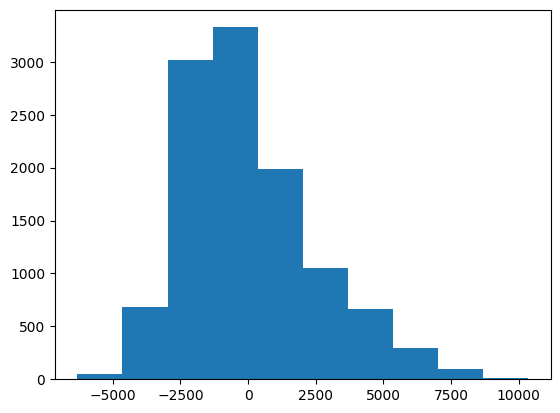

In [158]:
plt.hist(modelo_completo_2.resid)
plt.show()

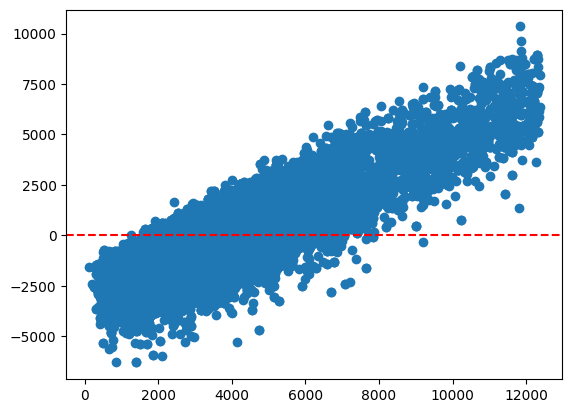

In [165]:
plt.scatter(y, modelo_completo_2.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

- Como o histograma não está representando uma distribuição normal
- E os resíduos apresentam um padrão
- Temos o indicativo de que modelo não está capturando bem as relações entre as variáveis.